In [5]:
from typing import Dict , TypedDict, List
from langgraph.graph import StateGraph,END
import random

In [2]:
class Agentstate(TypedDict):
    name: str
    number: List[int]
    counter: int


In [4]:
def greeting_node(state: Agentstate)-> Agentstate:
    state["name"]=f"hey,{state["name"]}"
    state["counter"]=0
    return state
def random_node(state:Agentstate)->Agentstate:
    state["number"].append(random.randint(1,10))
    state["counter"]+=1

    return state
def should_continue(state:Agentstate)->Agentstate:
    if state["counter"]<5:
        print("entering loop",state["counter"])
        return "loop"
    else:
        return "exit"


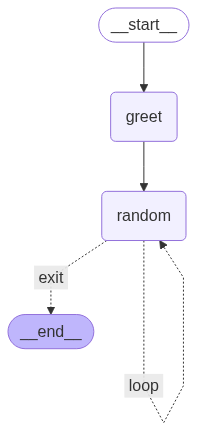

In [7]:
graph=StateGraph(Agentstate)
graph.add_node("greet",greeting_node)
graph.add_node("random",random_node)
graph.add_edge("greet","random")
graph.add_conditional_edges(
    "random",
    should_continue,
    {
        "loop":"random",
        "exit": END
    }
)
graph.set_entry_point("greet")
graph.compile()

In [8]:
app=graph.compile()

In [9]:
app.invoke({"name":"vaibhav","number":[],"counter":-1})

entering loop 1
entering loop 2
entering loop 3
entering loop 4


{'name': 'hey,vaibhav', 'number': [6, 4, 3, 4, 9], 'counter': 5}